## DATA SUMMARIES

## Introduction

https://www.codecademy.com/learn/paths/machine-learning-ai-engineering-foundations/tracks/mlef-exploratory-data-analysis-in-python/modules/mlef-summarizing-a-single-feature/cheatsheet

Before diving into formal analysis with a dataset, it is often helpful to perform some initial investigations of the data through exploratory data analysis (EDA) to get a better sense of what you will be working with. Basic summary statistics and visualizations are important components of EDA as they allow us to condense a large amount of information into a small set of numbers or graphics that can be easily interpreted.

This lesson focuses on <i>univariate summaries</i>, where we explore each variable separately. This is useful for answering questions about each individual feature. Variables can typically be classified as <i>quantitative</i> (i.e., numeric) or <i>categorical</i> (i.e., discrete). Depending on its type, we may want to choose different summary metrics and visuals to use.



In [15]:
import pandas as pd
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
movies = pd.read_csv('movies.csv')

# Print the first 5 rows 
movies.head()

,movie,production_budget,domestic_gross,worldwide_gross,mpaa_rating,genre
0,Evan Almighty,175000000.0,100289690.0,1.741313e+08,PG,Comedy
1,Waterworld,175000000.0,88246220.0,2.642462e+08,PG-13,Action
2,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,PG-13,Adventure
3,47 Ronin,175000000.0,38362475.0,1.517168e+08,PG-13,Action
4,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,PG-13,Action


The pandas library offers a handy method <b><code>.describe()</code></b> for displaying some of the most common summary statistics for the columns in a DataFrame. By default, the result only includes numeric columns, but we can specify <code>include='all'</code> to the method to display categorical ones as well:

In [7]:
# Print the summary statistics for all columns
movies.describe(include='all')

,movie,production_budget,domestic_gross,worldwide_gross,mpaa_rating,genre
count,3401,3.401000e+03,3.401000e+03,3.401000e+03,3264,3401
unique,3400,NaN,NaN,NaN,4,5
top,Tau ming chong,NaN,NaN,NaN,R,Drama
freq,2,NaN,NaN,NaN,1514,1236
mean,NaN,3.328474e+07,4.542179e+07,9.411512e+07,NaN,NaN
std,NaN,3.489239e+07,5.882566e+07,1.409182e+08,NaN,NaN
min,NaN,2.500000e+05,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,9.000000e+06,6.118683e+06,1.061881e+07,NaN,NaN
50%,NaN,2.000000e+07,2.553382e+07,4.015902e+07,NaN,NaN
75%,NaN,4.500000e+07,6.032379e+07,1.176152e+08,NaN,NaN


***

## Central Tendency for Quantitative Data

For quantitative variables, we often want to describe the central tendency, or the “typical” value of a variable. For example, what is the typical cost of rent in New York City?

There are several common measures of central tendency:

<ul>
<li><b>Mean</b>: The average value of the variable, calculated as the sum of all values divided by the number of values.</li>
<li><b>Median</b>: The middle value of the variable when sorted.</li>
<li><b>Mode</b>: The most frequent value of the variable.</li>
<li><b>Trimmed mean</b>: The mean excluding x percent of the lowest and highest data points.</li>
</ul>


In [11]:
# Save the mean to mean_budget
mean_budget = movies.production_budget.mean()

# Save the median to med_budget
med_budget = movies.production_budget.median()

# Save the mode to mode_budget
mode_budget = movies.production_budget.mode()

# Save the trimmed mean to trmean_budget
trmean_budget = trim_mean(movies.production_budget, proportiontocut=0.2)

***

## Spread for Quantitative Data


The spread of a quantitative variable describes the amount of variability. This is important because it provides context for measures of central tendency. For example, if there is a lot of variability in New York City rent prices, we can be less certain that the mean or median price is representative of what the typical rent is.

There are several common measures of spread:

- __Range__: The difference between the maximum and minimum values of a variable.
- __Interquartile range (IQR)__: The difference between the 75th and 25th percentile values.
- __Variance__: The average of the squared distance from each data point to the mean.
- __Standard deviation (SD)__: The square root of the variance.
- __Mean absolute deviation (MAD)__: The mean absolute value of the distance between each data point and the mean.

In [13]:
# Save the range to range_budget
range_budget = movies.production_budget.max() - movies.production_budget.min()

# Save the interquartile range to iqr_budget
iqr_budget = movies.production_budget.quantile(0.75) - movies.production_budget.quantile(0.25)

# Save the variance to var_budget
var_budget = movies.production_budget.var()

# Save the standard deviation to std_budget
std_budget = movies.production_budget.std()

# Save the mean absolute deviation to mad_budget
mad_budget = movies.production_budget.mad()


***

## Visualizing Quantitative Variables

While summary statistics are certainly helpful for exploring and quantifying a feature, we might find it hard to wrap our minds around a bunch of numbers. This is why data visualization is such a powerful element of EDA.

For quantitative variables, boxplots and histograms are two common visualizations. These plots are useful because they simultaneously communicate information about minimum and maximum values, central location, and spread. Histograms can additionally illuminate patterns that can impact an analysis (e.g., skew or multimodality).

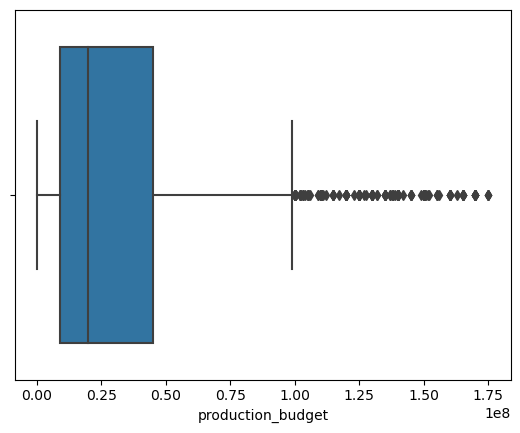

In [16]:
# Create a boxplot for movie budget 
sns.boxplot(x='production_budget', data=movies)
plt.show()
plt.close()

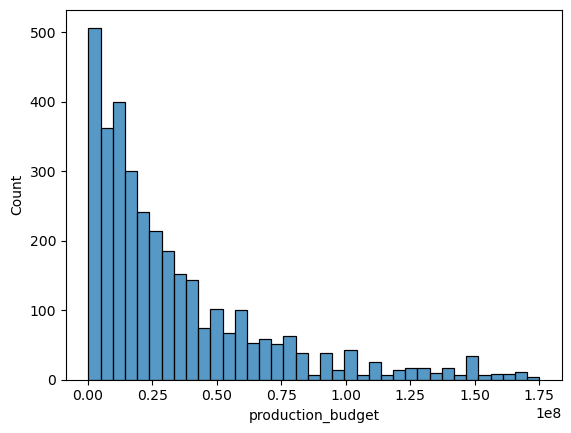

In [17]:
# Create a histogram for movie budget
sns.histplot(x='production_budget', data=movies)
plt.show()
plt.close()

***

## Value Counts for Categorical Data


When it comes to categorical variables, the measures of central tendency and spread that worked for describing numeric variables, like mean and standard deviation, generally becomes unsuitable when we’re dealing with discrete values. Unlike numbers, categorical values are not continuous and oftentimes do not have an intrinsic ordering.

Instead, a good way to summarize categorical variables is to generate a frequency table containing the count of each distinct value. For example, we may be interested to know how many of the New York City rental listings are from each borough. Related, we can also find which borough has the most listings.

The pandas library offers the <code>.value_counts()</code> method for generating the counts of all values in a DataFrame column

In [18]:
# Save the counts to genre_counts
genre_counts = movies.genre.value_counts()
print(genre_counts)

Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
Name: genre, dtype: int64


## Value Proportions for Categorical Data


A counts table is one approach for exploring categorical variables, but sometimes it is useful to also look at the proportion of values in each category. For example, knowing that there are 3,539 rental listings in Manhattan is hard to interpret without any context about the counts in the other categories. On the other hand, knowing that Manhattan listings make up 71% of all New York City listings tells us a lot more about the relative frequency of this category.

We can calculate the proportion for each category by dividing its count by the total number of values for that variable:



In [19]:
# Save the proportions to genre_props
genre_props = movies.genre.value_counts() / len(movies.genre)
genre_props

Drama        0.363423
Comedy       0.239047
Action       0.168480
Adventure    0.141429
Horror       0.087621
Name: genre, dtype: float64

## Visualizing Categorical Variables

For categorical variables, bar charts and pie charts are common options for visualizing the count (or proportion) of values in each category. They can also convey the relative frequencies of each category.

In general, many data analysts avoid pie charts because people are better at visually comparing areas of rectangles than wedges of a pie. For a variable with a small number of categories (i.e., fewer than three), a pie chart is a reasonable choice; however, for more complex data, a bar chart is usually preferable.

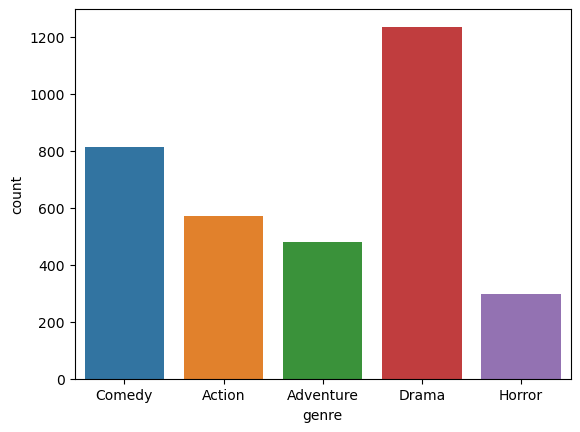

In [20]:
# Create a bar chart for movie genre 
sns.countplot(x='genre', data=movies)
plt.show()
plt.close()

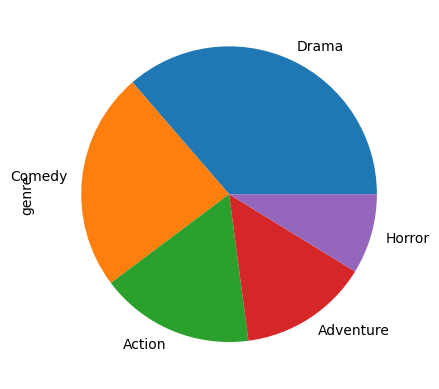

In [21]:
# Create a pie chart for movie genre
movies.genre.value_counts().plot.pie()
plt.show()
plt.close()

***